## Project Overview

For this project, you will use regression modeling to analyze house sales in a northwestern county.

### The Data

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder.
The description of the column names can be found in column_names.md in the same folder. 

### Business Problem

### Importing Libraries and Loading the data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("kc_house_data.csv", index_col=0)
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1.Data Cleaning

In [8]:
# Function to filter the irrelevant columns and remain with only the relevant ones
def Drop_irrelevant_columns(df_name,drop_columns_names):
    # Reassign df_name so that it only contains relevant columns
    drop_column = df_name.drop(drop_columns_names ,axis=1,inplace=True)
    return df_name

In [9]:
column_names_drop = 'id'

In [10]:
#Drop_irrelevant_columns(X_train,column_names_drop)

In [11]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [12]:
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [13]:
df['year'] = pd.to_datetime(df['date']).dt.year
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015


In [14]:
df['month'] = pd.to_datetime(df['date']).dt.month
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2


In [15]:
df['House_Age'] = df['year'] - df['yr_built']
df['House_Age']

id
7129300520    59
6414100192    63
5631500400    82
2487200875    49
1954400510    28
              ..
263000018      5
6600060120     1
1523300141     5
291310100     11
1523300157     6
Name: House_Age, Length: 21597, dtype: int64

In [16]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year                0
month               0
House_Age           0
dtype: int64

In [17]:
df['waterfront']

id
7129300520    NaN
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
             ... 
263000018     0.0
6600060120    0.0
1523300141    0.0
291310100     NaN
1523300157    0.0
Name: waterfront, Length: 21597, dtype: float64

In [18]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
# Fill all the null values of the waterfront with 0
df["waterfront"] = df["waterfront"].fillna(method='bfill')
df["waterfront"].value_counts()

0.0    21427
1.0      170
Name: waterfront, dtype: int64

In [20]:
df['waterfront'].isna().sum()

0

In [21]:
df['yr_renovated']

id
7129300520       0.0
6414100192    1991.0
5631500400       NaN
2487200875       0.0
1954400510       0.0
               ...  
263000018        0.0
6600060120       0.0
1523300141       0.0
291310100        0.0
1523300157       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [22]:
df['yr_renovated'].isna().sum()

3842

In [23]:
df['yr_renovated'].fillna(0,inplace=True)

In [24]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [26]:
df['view'] = df['view'].fillna(method='bfill')

In [27]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
House_Age        0
dtype: int64

In [28]:
df['view'].value_counts()

0.0    19483
2.0      958
3.0      509
1.0      330
4.0      317
Name: view, dtype: int64

In [29]:
df['view'].isna().sum()

0

In [30]:
df['sqft_basement'].replace({'?': 0.0},inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipco

### 2.Explanatory Data Analysis

### Data Visualization

In [31]:
sns.set_style("darkgrid")

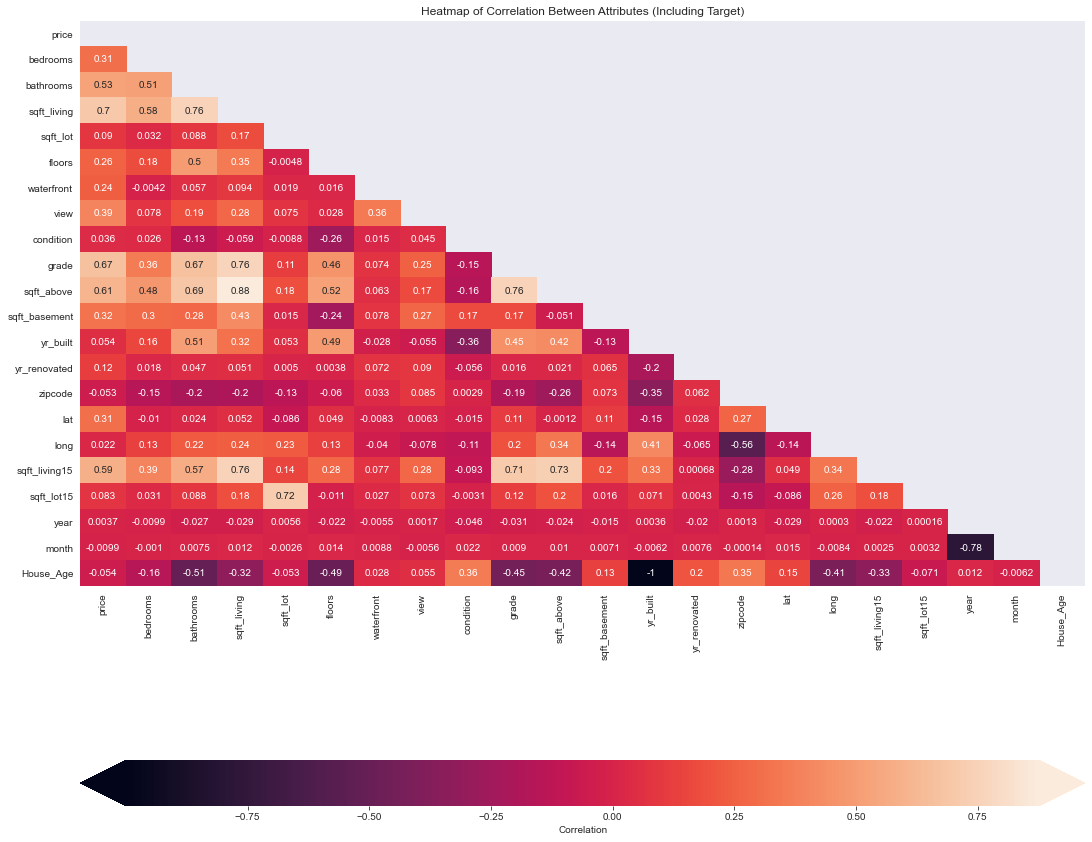

In [32]:

corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Text(0.5, 0, 'yr_built')

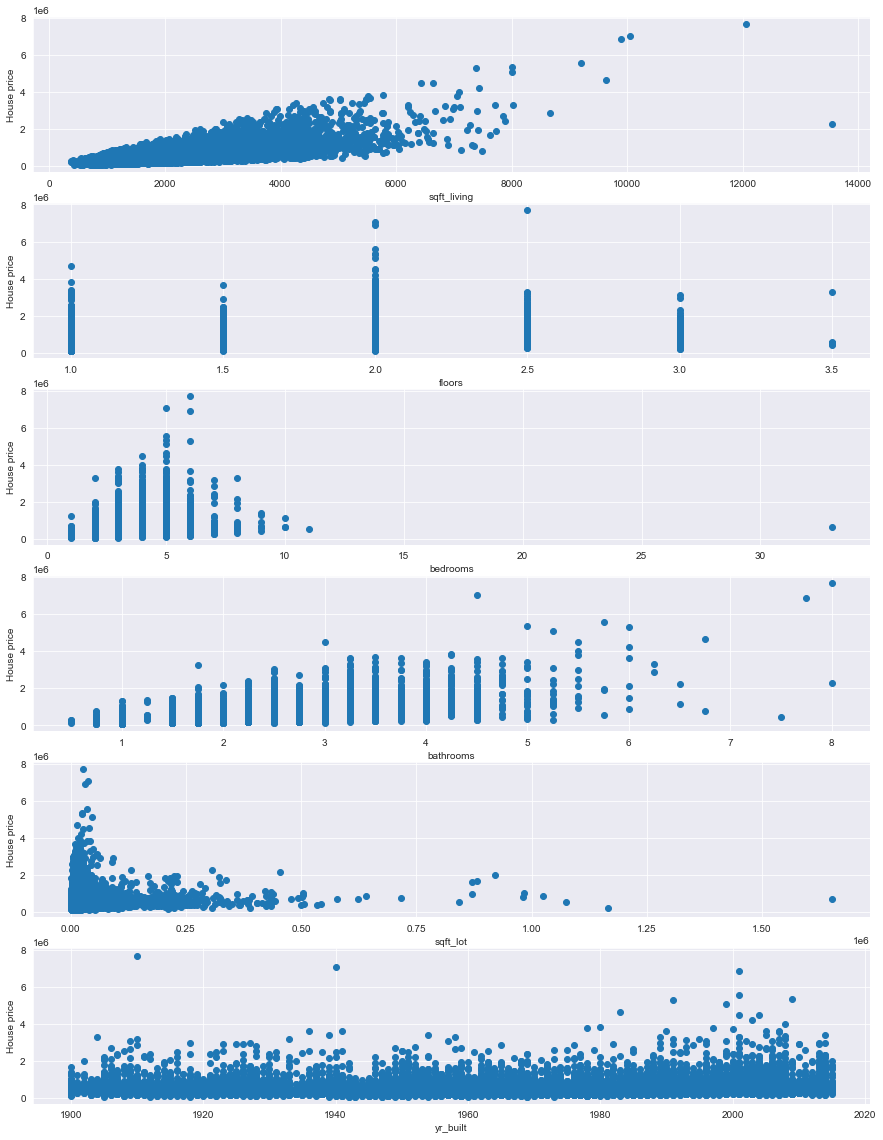

In [109]:

fig, ax = plt.subplots(6, figsize=(15, 20))
ax[0].scatter( x = df['sqft_living'], y = df['price'])
ax[0].set_ylabel("House price")
ax[0].set_xlabel("sqft_living")

ax[1].scatter(x = df['grade'], y = df['price'])
ax[1].set_ylabel("House price")
ax[1].set_xlabel("floors")

ax[2].scatter(x = df['bedrooms'] ,y = df['price'])
ax[2].set_ylabel("House price")
ax[2].set_xlabel("bedrooms")

ax[3].scatter(x = df['bathrooms'],y = df['price'])
ax[3].set_ylabel("House price")
ax[3].set_xlabel("bathrooms")

ax[4].scatter(x = df['sqft_lot'], y = df['price'])
ax[4].set_ylabel("House price")
ax[4].set_xlabel("sqft_lot")

ax[5].scatter(x = df['condition'], y = df['price'])
ax[5].set_ylabel("House price")
ax[5].set_xlabel("yr_built")



Text(0.5, 0, 'sqft_lot15')

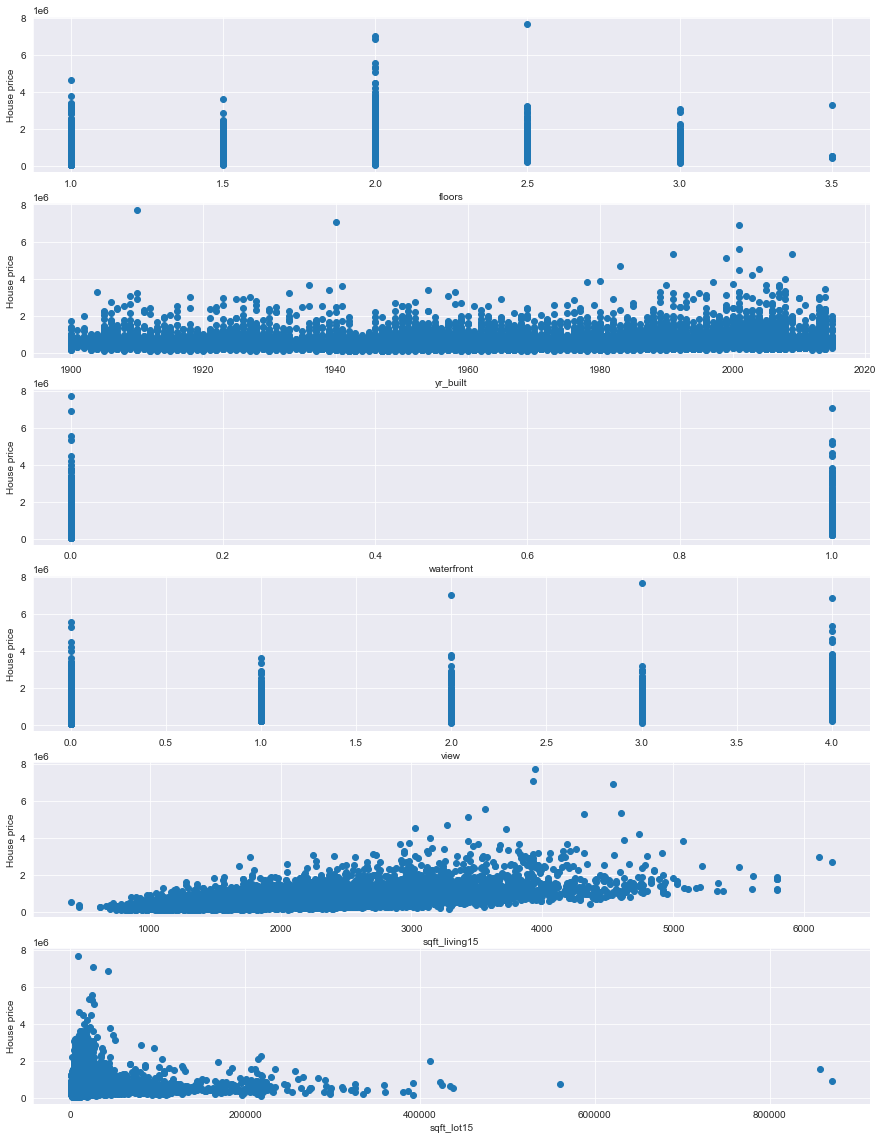

In [110]:
fig, ax = plt.subplots(6, figsize=(15, 20))
ax[0].scatter( x = df['floors'], y = df['price'])
ax[0].set_ylabel("House price")
ax[0].set_xlabel("floors")

ax[1].scatter(x = df['yr_built'], y = df['price'])
ax[1].set_ylabel("House price")
ax[1].set_xlabel("yr_built")

ax[2].scatter(x = df['waterfront'] ,y = df['price'])
ax[2].set_ylabel("House price")
ax[2].set_xlabel("waterfront")

ax[3].scatter(x = df['view'],y = df['price'])
ax[3].set_ylabel("House price")
ax[3].set_xlabel("view")

ax[4].scatter(x = df['sqft_living15'], y = df['price'])
ax[4].set_ylabel("House price")
ax[4].set_xlabel("sqft_living15")

ax[5].scatter(x = df['sqft_lot15'], y = df['price'])
ax[5].set_ylabel("House price")
ax[5].set_xlabel("sqft_lot15")


(array([ 200000.,  300000.,  400000.,  500000.,  600000.,  700000.,
         800000.,  900000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

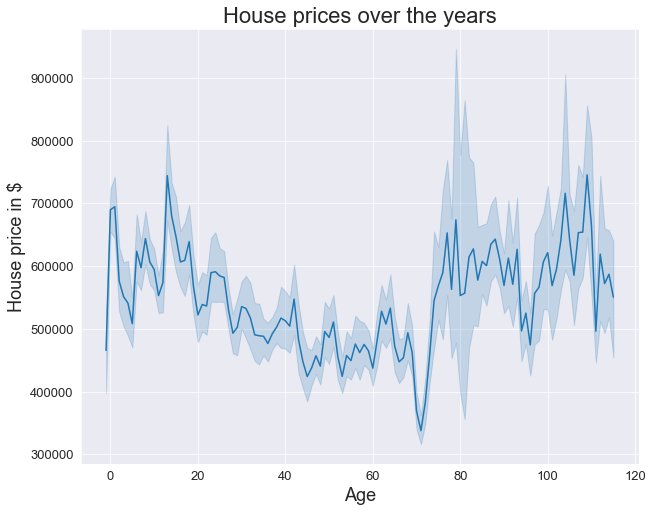

In [37]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="House_Age", y="price", data=df)
ax.set_title('House prices over the years',fontsize= 22)
ax.set_xlabel('Age',fontsize= 18)
ax.set_ylabel('House price in $',fontsize= 18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([480000., 500000., 520000., 540000., 560000., 580000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

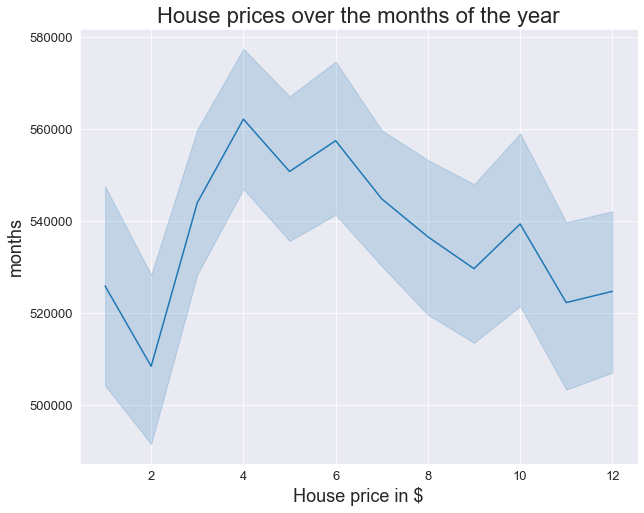

In [38]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(data=df, x="month", y="price")
ax.set_title('House prices over the months of the year',fontsize= 22)
ax.set_ylabel('months',fontsize= 18)
ax.set_xlabel('House price in $',fontsize= 18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([532500., 535000., 537500., 540000., 542500., 545000., 547500.,
        550000., 552500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

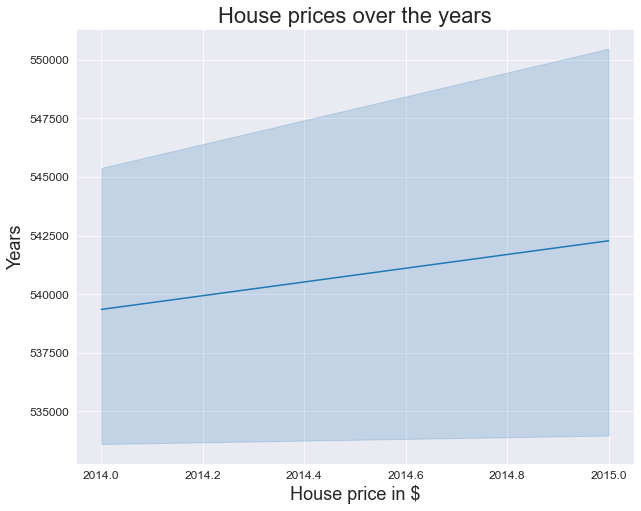

In [39]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(data=df, x="year", y="price")
ax.set_title('House prices over the years',fontsize= 22)
ax.set_ylabel('Years',fontsize= 18)
ax.set_xlabel('House price in $',fontsize= 18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [40]:
#Creating a function to group data by their mean 
def class_grouped_means(data,columns,items_to_group_by):
    grouped_data = data.groupby(items_to_group_by)[columns].mean()
    grouped_df = pd.DataFrame(grouped_data)
    grouped_data.reset_index( drop= False, inplace= True)

    return grouped_df

In [41]:
grouping = class_grouped_means(df,['price'],'House_Age')
grouping_1 = grouping.sort_values(by=['price'], ascending=False).head(20)
grouping_1.head()

,House_Age,price
110,109,745551.422535
14,13,744351.986207
105,104,716220.467890
2,1,694757.529825
1,0,690023.588372


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

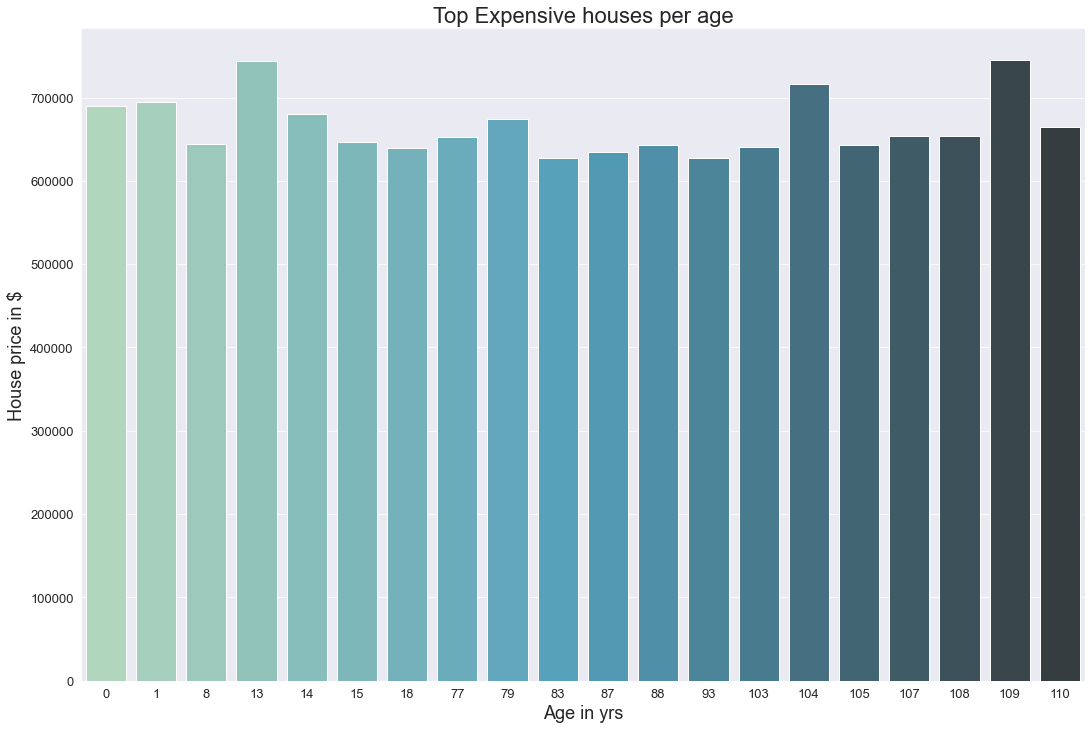

In [42]:
#Visualisation
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,12))
ax = sns.barplot(x = 'House_Age', y = 'price',data= grouping_1 ,palette='GnBu_d',orient='v')

ax.set_title('Top Expensive houses per age',fontsize= 22)
ax.set_xlabel('Age in yrs',fontsize= 18)
ax.set_ylabel('House price in $',fontsize= 18)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#bar.savefig("Title_VS_WorldWide_gross.png")

In [43]:
grouping = class_grouped_means(df,['price'],'grade')
grouping_2 = grouping.sort_values(by=['price'], ascending=False).head(10)
grouping_2.head()

,grade,price
10,13,3.710769e+06
9,12,2.202528e+06
8,11,1.497792e+06
7,10,1.072347e+06
6,9,7.737382e+05


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

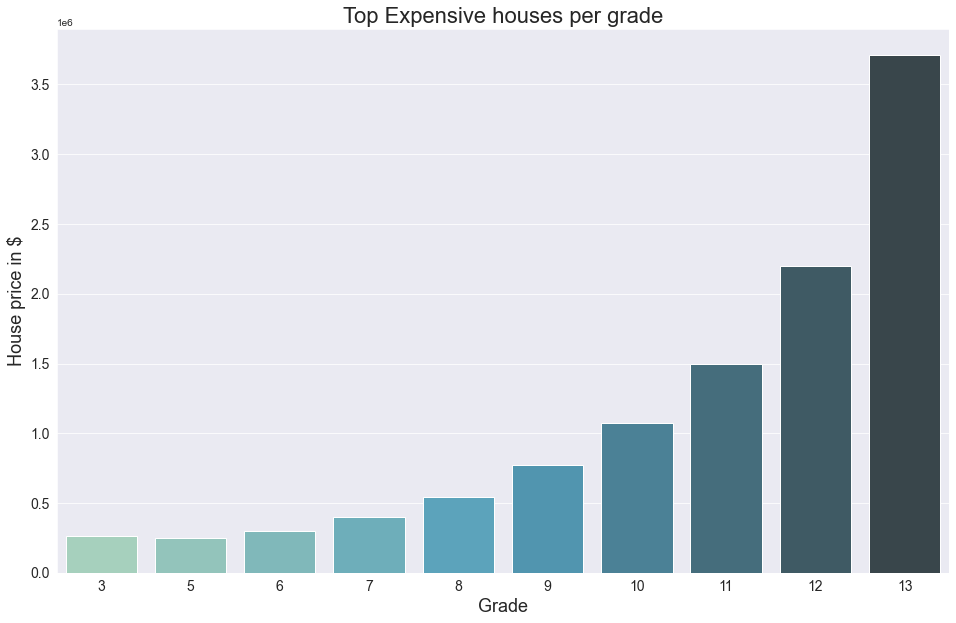

In [44]:
#Visualisation
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x = 'grade', y = 'price',data= grouping_2 ,palette='GnBu_d',orient='v')

ax.set_title('Top Expensive houses per grade',fontsize= 22)
ax.set_xlabel('Grade',fontsize= 18)
ax.set_ylabel('House price in $',fontsize= 18)

plt.xticks(rotation=0,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
#bar.savefig("Title_VS_WorldWide_gross.png")

In [45]:
grouping = class_grouped_means(df,['price'],'condition')
grouping_3 = grouping.sort_values(by=['price'], ascending=False).head(10)
grouping_3.head()

,condition,price
4,5,612577.742504
2,3,542173.057347
3,4,521374.450414
0,1,341067.241379
1,2,328178.758824


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

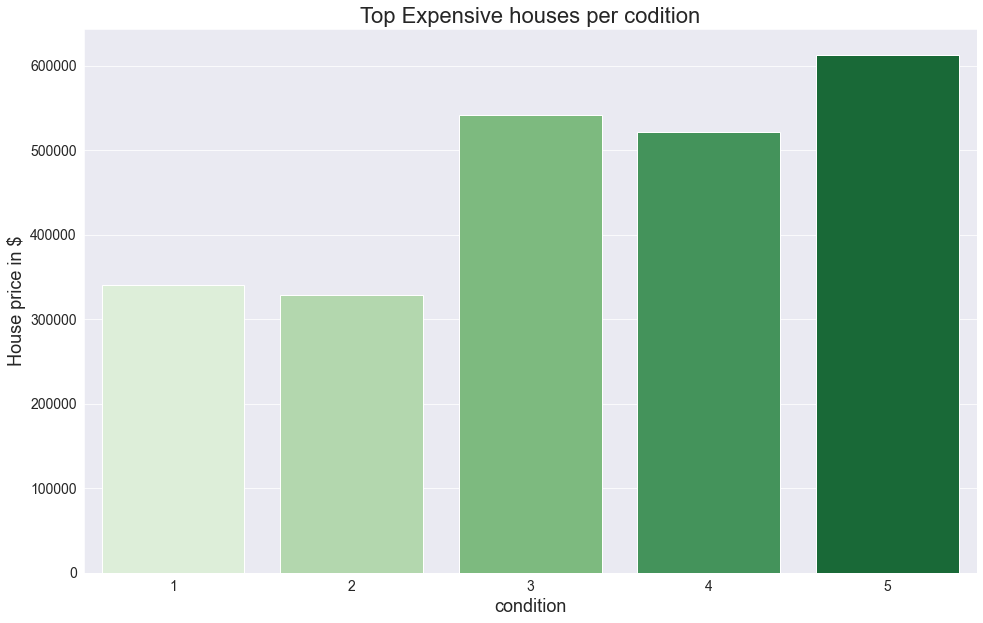

In [46]:
#Visualisation
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x = 'condition', y = 'price',data= grouping_3 ,palette='Greens',orient='v')

ax.set_title('Top Expensive houses per codition',fontsize= 22)
ax.set_xlabel('condition',fontsize= 18)
ax.set_ylabel('House price in $',fontsize= 18)

plt.xticks(rotation=0,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
#bar.savefig("Title_VS_WorldWide_gross.png")

### 3.Convert Categorical Features into Numbers

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  year           21597 non-null  int64  
 14  House_Age      21597 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.6 MB


In [58]:
def Convert_categorical_numeric(df,column_name):
    from sklearn.preprocessing import OrdinalEncoder
    
    column_train = df[[column_name]]
    # Instantiate an OrdinalEncoder
    encoder_column = OrdinalEncoder()
    # Fit the encoder on column_train
    encoder_column.fit(column_train)
    # Inspect the categories of the fitted encoder
    print(encoder_column.categories_[0])
    
    column_encoded_train = encoder_column.transform(column_train)
    # Flatten for appropriate shape
    column_encoded_train = column_encoded_train.flatten()
    # Visually inspect column_encoded_train
    print(column_encoded_train)
    
    df[column_name] = column_encoded_train
    return df

In [53]:
column_names = ['bathroom','floors','waterfront','view','sqft_basement','yr_renovated','lat','long']

In [54]:
def convert_to_numeric(df_name,column_names):
    for column_name in column_names:
        converted = pd.to_numeric(df_name,column_name)
        new = new_columns.append(converted)
    return new

In [55]:
pd.to_numeric(df['bathrooms'])

id
7129300520    1.00
6414100192    2.25
5631500400    1.00
2487200875    3.00
1954400510    2.00
              ... 
263000018     2.50
6600060120    2.50
1523300141    0.75
291310100     2.50
1523300157    0.75
Name: bathrooms, Length: 21597, dtype: float64

In [56]:
pd.to_numeric(df['floors'])

id
7129300520    1.0
6414100192    2.0
5631500400    1.0
2487200875    1.0
1954400510    1.0
             ... 
263000018     3.0
6600060120    2.0
1523300141    2.0
291310100     2.0
1523300157    2.0
Name: floors, Length: 21597, dtype: float64

In [57]:
pd.to_numeric(df['waterfront'])

id
7129300520    0.0
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
             ... 
263000018     0.0
6600060120    0.0
1523300141    0.0
291310100     0.0
1523300157    0.0
Name: waterfront, Length: 21597, dtype: float64

### 4.Feature Selection

In [51]:
df.drop([ 'lat',
         'long','yr_renovated','zipcode','month','sqft_basement','sqft_above','date'], axis = 1, inplace = True) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  year           21597 non-null  int64  
 14  House_Age      21597 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.6 MB


In [65]:
features = df.columns
features

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'year', 'House_Age'],
      dtype='object')

In [59]:
Y = df['price']
X = df.drop("price", axis=1)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [61]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 16197 rows and 14 columns
y_train is a Series with 16197 values


In [119]:
# Function to help find feature with the highest importance while eliminating the ones of lower importance
def Feature_selector(X_variable,Y_variable):
    from sklearn.feature_selection import RFECV
    from sklearn.preprocessing import StandardScaler
    
    # Importances are based on coefficient magnitude, so
    # we need to scale the data to normalize the coefficients
    X_train_for_RFECV = StandardScaler().fit_transform(X_variable)
    model_for_RFECV = LinearRegression()
    
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(X_train_for_RFECV, Y_variable)
    
    print("Was the column selected?")
    for index, col in enumerate(X_variable.columns):
        print(f"{col}: {selector.support_[index]}")
    

In [128]:
from statsmodels.formula.api import ols
formula = "price ~ bedrooms+bathrooms+sqft_living+floors+condition+grade+yr_built+waterfront+view+sqft_living15+year+sqft_lot15"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3376.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:26:18   Log-Likelihood:            -2.9598e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21584   BIC:                         5.921e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.755e+07   6.37e+06     -7.470      0.000      -6e+07   -3.51e+07
bedrooms      -4.025e+04   2039.499    -19.733      0.000   -4.42e+04   -3.62e+04
bathrooms      4.793e+04   3437.674     13.943      0.000    4.12e+04    5.47e+04
sqft_living     163.6335      3.594     45.524      0.000     156.588     170.679
floors         2.641e+04   3445.812      7.666      0.000    1.97e+04    3.32e+04
condition      2.038e+04   2468.560      8.254      0.000    1.55e+04    2.52e+04
grade          1.207e+05   2252.745     53.567      0.000    1.16e+05    1.25e+05
yr_built      -3649.2830     67.237    -54.275      0.000   -3781.072   -3517.494
waterfront     5.147e+05   1.79e+04     28.803      0.000     4.8e+05     5.5e+05
view           4.812e+04   2199.230     21.881      0.000    4.38e+04    5.24e+04
sqft_living15    22.7038      3.536      6.420      0.000      15.772      29.635
year           2.675e+04   3159.785      8.467      0.000    2.06e+04    3.29e+04
sqft_lot15       -0.5681      0.056    -10.186      0.000      -0.677      -0.459
==============================================================================
Omnibus:                    16350.585   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188205.863
Skew:                           3.042   Prob(JB):                         0.00
Kurtosis:                      38.825   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Interpret the results

In [120]:
Feature_selector(X_train,y_train)

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
condition: True
grade: True
yr_built: True
sqft_living15: True
sqft_lot15: True
year: True
House_Age: True


In [ ]:
#interpret the results

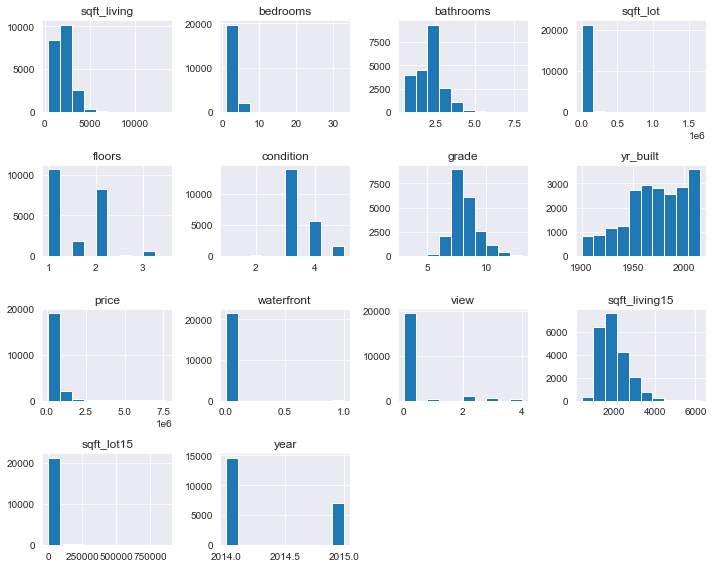

In [116]:
# checking the visual distribution of our data with histograms
df[['sqft_living','bedrooms','bathrooms','sqft_lot','floors','condition','grade','yr_built', 'price','waterfront','view','sqft_living15','sqft_lot15','year']].hist(figsize=(10,8))
plt.tight_layout();

### 5.Modelling

#### Building a Baseline Model

#### Model 1

In [121]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [124]:
most_correlated_feature = 'sqft_living'

In [125]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [ ]:
"""
In general this seems like a fairly weak model. 
It is getting nearly identical performance on training subsets compared to the validation subsets, 
explaining around 50% of the variance both times
"""

#### Model 2

In [126]:
# Function to compute model linear regression score
def model_score(X_variable,Y_variable):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    
    model = LinearRegression()
    model.fit(X_variable,Y_variable)
    score = cross_val_score(model, X_variable, Y_variable, cv=3)
    return score


In [127]:
# Calling the function 
model_score(X_train,y_train)

array([0.65500922, 0.66890319, 0.63695302])

In [ ]:
# Interpret results

#### Model 3

#### Model 4

### 6. Validate with Test Data

In [78]:
model_score(X_test,y_test)

array([0.60198294, 0.62860933, 0.62544548])

### &